# `flood_func`
Floods the regions of an image with values computed by the supplied numpy function.

In [5]:
import numpy as np
import porespy as ps
import matplotlib.pyplot as plt
import scipy.ndimage as spim
from edt import edt
from skimage.segmentation import watershed

ps.visualization.set_mpl_style()
np.random.seed(0)

## `func`

The function can be anything in numpy that operates on an array. For instance, when passing in the ``np.sum`` function it will compute the sum of voxels with each regions and replace those values with the sum.  This allows for the determination of a regions size.  Or, if the supplied image is the distance transform the ``np.amax`` function can be supplied to color each region by the maximum size found within it.

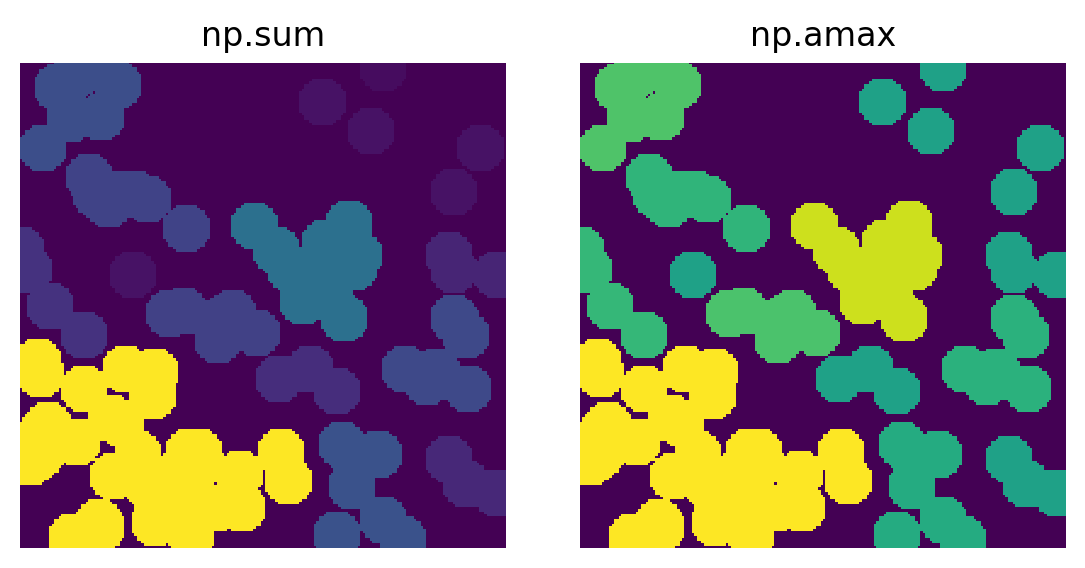

In [6]:
fig, ax = plt.subplots(1, 2, figsize=[6, 3])

im = ~ps.generators.overlapping_spheres(shape=[200, 200], porosity=0.5, r=10)
flooded = ps.filters.flood_func(im=im, func=np.sum)

ax[0].imshow(flooded)
ax[0].axis(False)
ax[0].set_title("np.sum")

dt = edt(im)
flooded = ps.filters.flood_func(im=dt, func=np.amax)
ax[1].imshow(flooded)
ax[1].axis(False)
ax[1].set_title("np.amax");

## `labels`
An image with each region of interest labelled.  If not provided the ``scipy.ndimage.label`` function is applied.

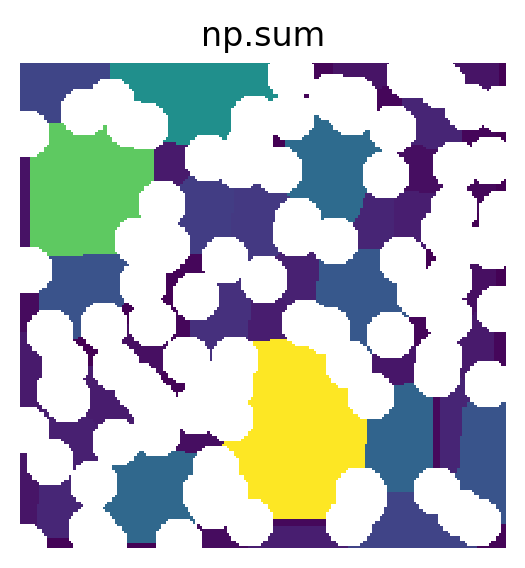

In [8]:
im = ps.generators.overlapping_spheres(shape=[200, 200], porosity=0.5, r=10)
dt = edt(im)
dt = spim.gaussian_filter(dt, sigma=0.4)
pk = ps.filters.find_peaks(dt=dt)
ws = watershed(-dt, markers=spim.label(pk)[0])

flooded = ps.filters.flood_func(im=im, labels=ws, func=np.sum) * im

fig, ax = plt.subplots(1, 1, figsize=[6, 3])
ax.imshow(flooded / im)
ax.axis(False)
ax.set_title("np.sum");